In [36]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [5]:
np.random.seed(123)

In [7]:
data = pd.read_csv("autism_screening.csv")
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [9]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [10]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [13]:
print(f"Maximum age is data: {data['age'].max()}\n")
print(f"Minimum age is data: {data['age'].min()}")

Maximum age is data: 383.0

Minimum age is data: 17.0


In [14]:
#dropping max age because it is an outlier
data[data['age'] == data['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [11]:
data['result'].value_counts()

4.0     131
3.0     110
5.0      83
2.0      74
6.0      70
7.0      57
8.0      55
9.0      47
1.0      33
10.0     30
0.0      14
Name: result, dtype: int64

In [16]:
# dropping record number 52
data.drop(index = 52, inplace = True)

# resetting index
data.reset_index(inplace = True)

In [17]:
# dropping record number 52
data.drop(index = 52, inplace = True)

# resetting index
data.reset_index(inplace = True)

In [21]:
#filling na values
data['age'] = data['age'].fillna(np.round(data['age'].mean(), 0))

In [22]:
data.isnull().sum()

level_0            0
index              0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [25]:
#preprocessing
data.drop(['index','age_desc'], axis = 1, inplace = True)      #dropping unwanted columns

In [27]:
X = data.drop("Class/ASD", axis = 1)    # select all other feature except "Class/ASD" for training
Y = data['Class/ASD']

In [28]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [30]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (526, 106)
Shape of Y_train is: (526, 2)

Shape of X_test is: (176, 106)
Shape of Y_test is: (176, 2)


Creating the model

In [31]:
input_dim = X.shape[1]

In [32]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [37]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 856       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


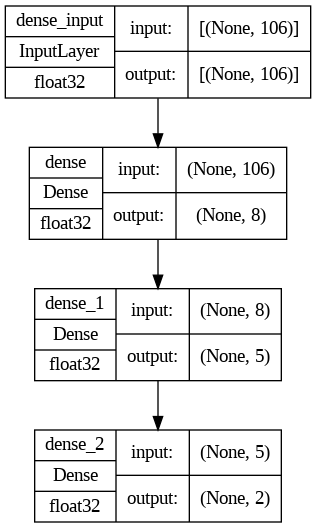

In [39]:
plot_model(model,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

In [47]:
result = model.fit(X_train, Y_train, epochs = 25, batch_size = 10)

Epoch 1/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9753
Epoch 2/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9696
Epoch 3/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9772
Epoch 4/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9810
Epoch 5/25
53/53 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9848
Epoch 6/25
53/53 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9791
Epoch 7/25
53/53 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9772
Epoch 8/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 9/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9829
Epoch 10/25
53/53 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9753
Epoch 11/25
53/53 [

In [48]:
loss, acc = model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9602


In [49]:
print(f"Accuracy on unseen data is: { np.round(acc, 2) }")
print(f'Loss on unseen data is: { np.round(loss, 2) }')

Accuracy on unseen data is: 0.96
Loss on unseen data is: 0.1


In [50]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis = 1)

6/6 [==============================] - 0s 1ms/step


In [51]:
print(accuracy_score(Y_test[['YES']], prediction))

0.9602272727272727


In [52]:
print(classification_report(Y_test[['YES']], prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       122
           1       0.91      0.96      0.94        54

    accuracy                           0.96       176
   macro avg       0.95      0.96      0.95       176
weighted avg       0.96      0.96      0.96       176

